Libraries imported successfully!
✅ NLTK setup completed successfully!

=== LOADING DATASETS ===
Current working directory: d:\Deep Learning for Comment Toxicity\notebooks
✅ Successfully loaded datasets!
Train dataset shape: (159571, 8)
Test dataset shape: (153164, 2)

=== TRAIN DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None

=== FIRST 5 ROWS ===
                 id                                       comment_text  toxic

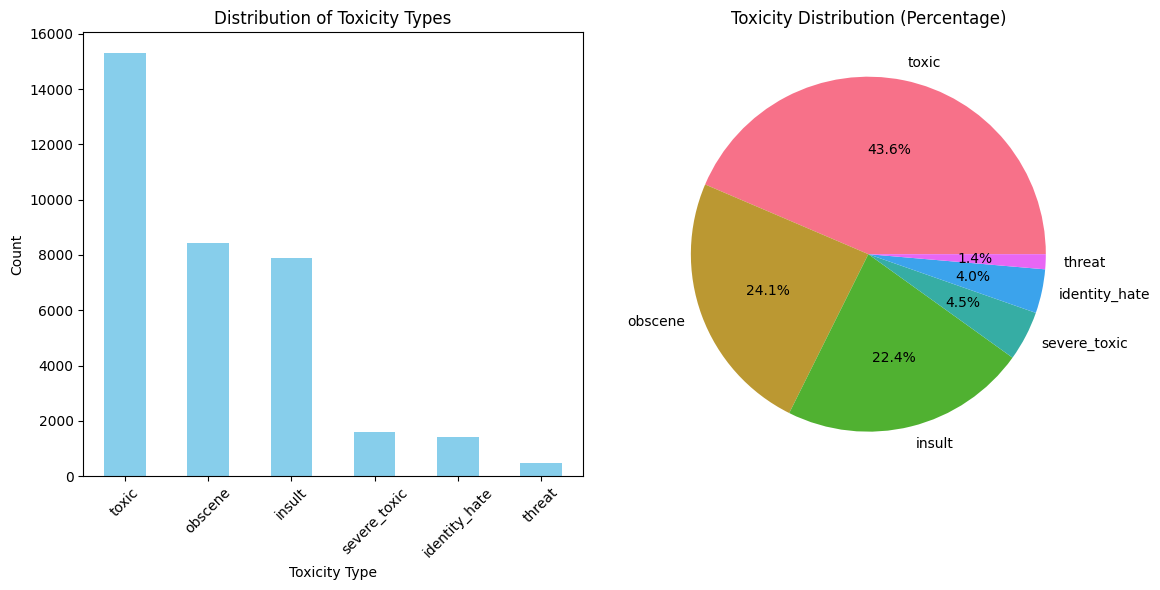


Comments with multiple toxicity labels: 9865
Percentage of multi-label comments: 6.18%


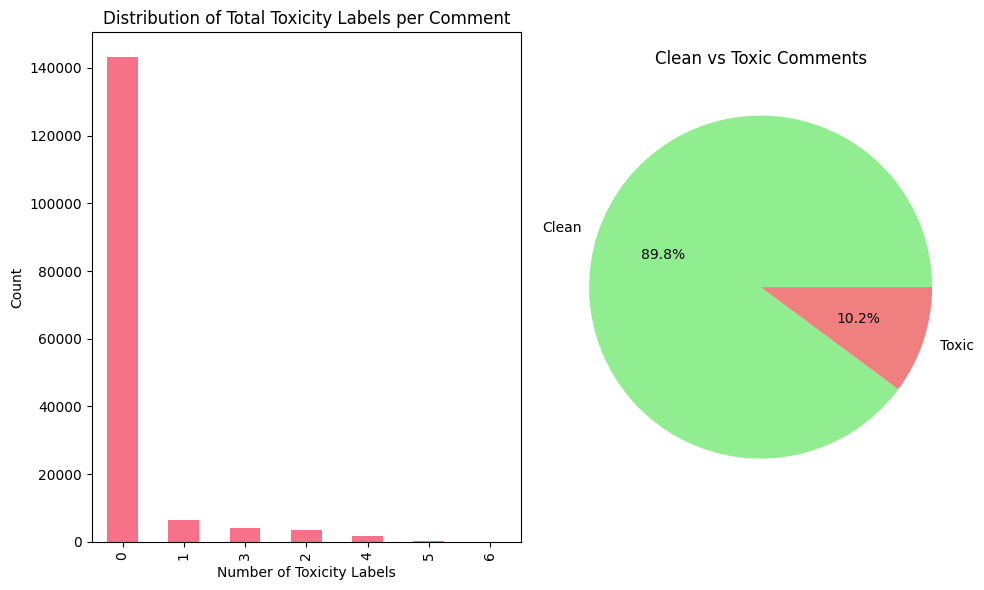


Clean comments: 143346 (89.83%)
Toxic comments: 16225 (10.17%)

=== TEXT DATA EXPLORATION ===
Comment Length Statistics:
count    159571.000000
mean        394.073215
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_length, dtype: float64

Word Count Statistics:
count    159571.000000
mean         67.273521
std          99.230703
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
Name: word_count, dtype: float64


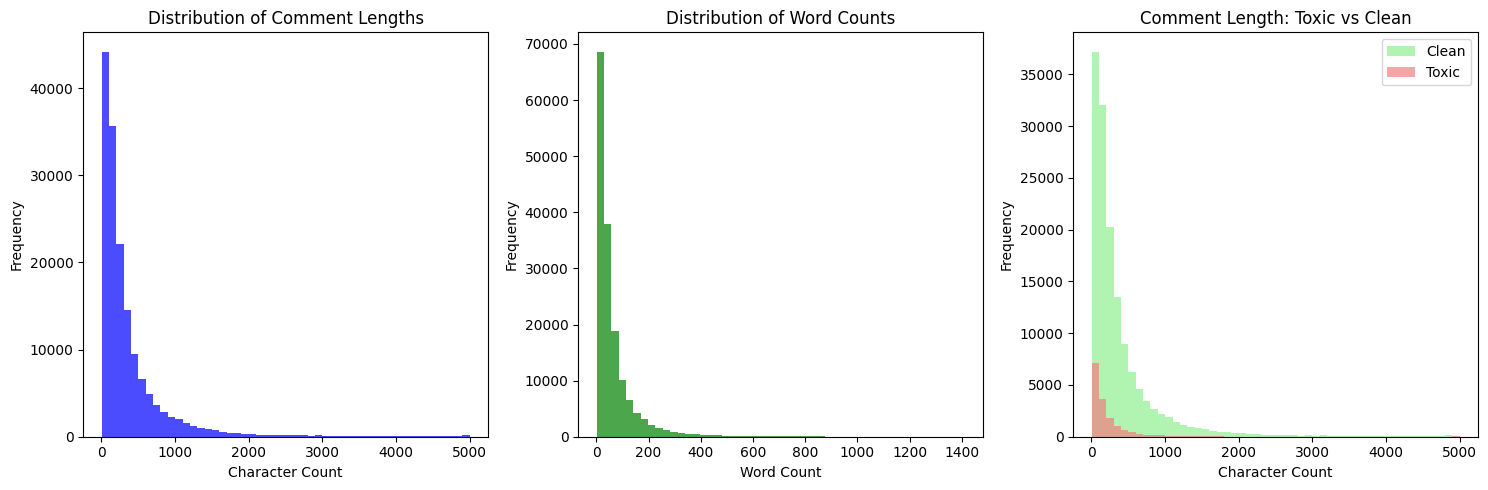


=== SAMPLE COMMENTS ===
Clean Comments:
1. Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't ...
2. D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11...
3. Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant ...

Toxic Comments:
1. COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK...
2. Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good a...
3. Bye! 

Don't look, come or think of comming back! Tosser....

=== APPLYING TEXT PREPROCESSING ===
Applying basic cleaning...
Applying advanced preprocessing...
Using NLTK-based preprocessing...
Removed 92 empty comments after preprocessing

=== PREPROCESSING COMPARISON ===
Original:
"

Congratulations from me as well, use the tools well.  · talk "

Cleaned:
congratulations from me as well use the tools well  talk

Processed:
congratulation well use tool we

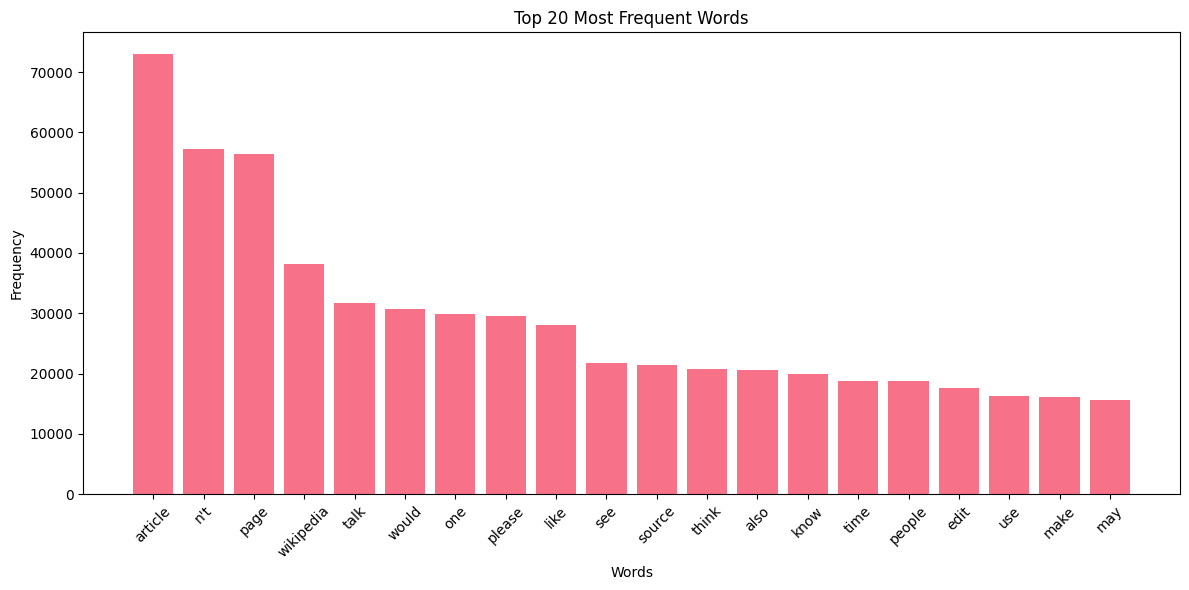


Generating word clouds...
Word cloud generation failed: 
Skipping word cloud visualization...

=== FEATURE EXTRACTION PREPARATION ===
Creating TF-IDF features...
TF-IDF feature matrix shape: (159479, 10000)
Labels shape: (159479, 6)
Training set shape: (127583, 10000)
Validation set shape: (31896, 10000)

=== SAVING PROCESSED DATA ===
Processed data saved successfully!
Files saved in: d:\Deep Learning for Comment Toxicity\data\processed

DATA PREPROCESSING SUMMARY REPORT
Original training samples: 159571
Processed training samples: 159479
Test samples: 153164
Number of toxicity categories: 6
Toxic comments percentage: 10.17%
Average comment length: 394.3 characters
Average word count: 67.3 words
TF-IDF vocabulary size: 10000
Preprocessing method: NLTK-based

Step 1 (Data Exploration and Preprocessing) completed successfully!
Ready for Step 2: Model Development

=== FINAL PROCESSED DATA SAMPLE ===
                 id                             comment_text_processed  \
0  0000997932d7

In [11]:
# Step 1: Data Exploration and Preprocessing for Toxicity Detection
# ================================================================
# Project Path: D:\Deep Learning for Comment Toxicity

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import string
import os
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

# ================================================================
# NLTK SETUP WITH ERROR HANDLING
# ================================================================

# Try to import and setup NLTK with proper error handling
try:
    import nltk
    print("Downloading NLTK data...")
    
    # Try both old and new NLTK resource names
    try:
        nltk.download('punkt_tab', quiet=True)
    except:
        nltk.download('punkt', quiet=True)
    
    try:
        nltk.download('stopwords', quiet=True)
        nltk.download('wordnet', quiet=True)
        nltk.download('omw-1.4', quiet=True)
    except:
        pass
    
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer
    
    # Test NLTK functionality
    test_tokens = word_tokenize("test sentence")
    test_stopwords = set(stopwords.words('english'))
    test_lemmatizer = WordNetLemmatizer()
    
    NLTK_AVAILABLE = True
    print("✅ NLTK setup completed successfully!")
    
except Exception as e:
    print(f"⚠️ NLTK setup failed: {e}")
    print("Proceeding with basic text preprocessing without NLTK...")
    NLTK_AVAILABLE = False

# ================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# ================================================================

print("\n=== LOADING DATASETS ===")

# Check current working directory
print(f"Current working directory: {os.getcwd()}")

# Define file paths (going up one level from notebooks to project root)
train_path = '../data/train.csv'
test_path = '../data/test.csv'

# Load the datasets
try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    print(f"✅ Successfully loaded datasets!")
    print(f"Train dataset shape: {train_df.shape}")
    print(f"Test dataset shape: {test_df.shape}")
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("Please make sure your CSV files are in the 'data' folder")
    raise

# Display basic information about train dataset
print("\n=== TRAIN DATASET INFO ===")
print(train_df.info())
print("\n=== FIRST 5 ROWS ===")
print(train_df.head())

# Check for missing values
print("\n=== MISSING VALUES ===")
print(train_df.isnull().sum())

# Basic statistics
print("\n=== BASIC STATISTICS ===")
print(train_df.describe())

# ================================================================
# 2. TOXICITY LABELS ANALYSIS
# ================================================================

# Define toxicity columns
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

print("\n=== TOXICITY DISTRIBUTION ===")
for col in toxicity_columns:
    toxic_count = train_df[col].sum()
    toxic_percentage = (toxic_count / len(train_df)) * 100
    print(f"{col}: {toxic_count} ({toxic_percentage:.2f}%)")

# Visualize toxicity distribution
plt.figure(figsize=(12, 6))
toxicity_counts = train_df[toxicity_columns].sum().sort_values(ascending=False)

plt.subplot(1, 2, 1)
toxicity_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Toxicity Types')
plt.xlabel('Toxicity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(toxicity_counts.values, labels=toxicity_counts.index, autopct='%1.1f%%')
plt.title('Toxicity Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Check for multi-label examples
train_df['total_toxicity'] = train_df[toxicity_columns].sum(axis=1)
multi_label_count = (train_df['total_toxicity'] > 1).sum()
print(f"\nComments with multiple toxicity labels: {multi_label_count}")
print(f"Percentage of multi-label comments: {(multi_label_count/len(train_df))*100:.2f}%")

# Distribution of total toxicity per comment
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
train_df['total_toxicity'].value_counts().plot(kind='bar')
plt.title('Distribution of Total Toxicity Labels per Comment')
plt.xlabel('Number of Toxicity Labels')
plt.ylabel('Count')

# Clean vs Toxic comments
train_df['is_toxic'] = (train_df['total_toxicity'] > 0).astype(int)
toxic_distribution = train_df['is_toxic'].value_counts()

plt.subplot(1, 2, 2)
plt.pie(toxic_distribution.values, labels=['Clean', 'Toxic'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Clean vs Toxic Comments')

plt.tight_layout()
plt.show()

print(f"\nClean comments: {toxic_distribution[0]} ({(toxic_distribution[0]/len(train_df))*100:.2f}%)")
print(f"Toxic comments: {toxic_distribution[1]} ({(toxic_distribution[1]/len(train_df))*100:.2f}%)")

# ================================================================
# 3. TEXT DATA EXPLORATION
# ================================================================

print("\n=== TEXT DATA EXPLORATION ===")

# Comment length analysis
train_df['comment_length'] = train_df['comment_text'].str.len()
train_df['word_count'] = train_df['comment_text'].str.split().str.len()

print("Comment Length Statistics:")
print(train_df['comment_length'].describe())
print("\nWord Count Statistics:")
print(train_df['word_count'].describe())

# Visualize text length distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(train_df['comment_length'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(train_df['word_count'], bins=50, alpha=0.7, color='green')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Compare toxic vs clean comment lengths
plt.subplot(1, 3, 3)
toxic_lengths = train_df[train_df['is_toxic'] == 1]['comment_length']
clean_lengths = train_df[train_df['is_toxic'] == 0]['comment_length']

plt.hist(clean_lengths, bins=50, alpha=0.7, label='Clean', color='lightgreen')
plt.hist(toxic_lengths, bins=50, alpha=0.7, label='Toxic', color='lightcoral')
plt.title('Comment Length: Toxic vs Clean')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Show sample comments
print("\n=== SAMPLE COMMENTS ===")
print("Clean Comments:")
clean_samples = train_df[train_df['is_toxic'] == 0]['comment_text'].head(3)
for i, comment in enumerate(clean_samples, 1):
    print(f"{i}. {comment[:100]}...")

print("\nToxic Comments:")
toxic_samples = train_df[train_df['is_toxic'] == 1]['comment_text'].head(3)
for i, comment in enumerate(toxic_samples, 1):
    print(f"{i}. {comment[:100]}...")

# ================================================================
# 4. TEXT PREPROCESSING FUNCTIONS
# ================================================================

def clean_text(text):
    """
    Comprehensive text cleaning function
    """
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove extra whitespace and newlines
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    
    # Remove numbers (optional - you might want to keep them)
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation but keep apostrophes for contractions
    text = re.sub(r'[^\w\s\']', '', text)
    
    # Remove extra spaces
    text = text.strip()
    
    return text

def basic_text_preprocessing(text):
    """
    Basic preprocessing without NLTK dependencies
    """
    if not text:
        return ""
    
    # Simple tokenization by splitting on whitespace
    tokens = text.split()
    
    # Basic stopwords (simple list)
    basic_stopwords = {
        'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
        'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
        'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
        'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
        'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
        'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
        'while', 'of', 'at', 'by', 'for', 'with', 'through', 'during', 'before', 'after',
        'above', 'below', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
        'further', 'then', 'once'
    }
    
    # Remove stopwords and short words
    tokens = [token for token in tokens if token not in basic_stopwords and len(token) > 2]
    
    return ' '.join(tokens)

def advanced_text_preprocessing_with_nltk(text):
    """
    Advanced preprocessing using NLTK
    """
    if not text:
        return ""
    
    try:
        from nltk.corpus import stopwords
        from nltk.tokenize import word_tokenize
        from nltk.stem import WordNetLemmatizer
        
        # Tokenization
        tokens = word_tokenize(text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        
        # Remove single characters and short words
        tokens = [token for token in tokens if len(token) > 2]
        
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
        return ' '.join(tokens)
    except:
        # Fallback to basic preprocessing if NLTK fails
        return basic_text_preprocessing(text)

# ================================================================
# 5. APPLY TEXT PREPROCESSING
# ================================================================

print("\n=== APPLYING TEXT PREPROCESSING ===")

# Create copies for preprocessing
train_processed = train_df.copy()
test_processed = test_df.copy()

# Basic cleaning
print("Applying basic cleaning...")
train_processed['comment_text_clean'] = train_processed['comment_text'].apply(clean_text)
test_processed['comment_text_clean'] = test_processed['comment_text'].apply(clean_text)

# Advanced preprocessing (with fallback)
print("Applying advanced preprocessing...")
if NLTK_AVAILABLE:
    print("Using NLTK-based preprocessing...")
    train_processed['comment_text_processed'] = train_processed['comment_text_clean'].apply(advanced_text_preprocessing_with_nltk)
    test_processed['comment_text_processed'] = test_processed['comment_text_clean'].apply(advanced_text_preprocessing_with_nltk)
else:
    print("Using basic preprocessing (NLTK not available)...")
    train_processed['comment_text_processed'] = train_processed['comment_text_clean'].apply(basic_text_preprocessing)
    test_processed['comment_text_processed'] = test_processed['comment_text_clean'].apply(basic_text_preprocessing)

# Remove empty comments after preprocessing
initial_count = len(train_processed)
train_processed = train_processed[train_processed['comment_text_processed'].str.len() > 0]
removed_count = initial_count - len(train_processed)
print(f"Removed {removed_count} empty comments after preprocessing")

# Compare before and after preprocessing
print("\n=== PREPROCESSING COMPARISON ===")
sample_idx = 5
print("Original:")
print(train_df.iloc[sample_idx]['comment_text'])
print("\nCleaned:")
print(train_processed.iloc[sample_idx]['comment_text_clean'])
print("\nProcessed:")
print(train_processed.iloc[sample_idx]['comment_text_processed'])

# ================================================================
# 6. WORD FREQUENCY ANALYSIS
# ================================================================

print("\n=== WORD FREQUENCY ANALYSIS ===")

# Combine all processed text
all_text = ' '.join(train_processed['comment_text_processed'])
word_freq = Counter(all_text.split())

print("Most common words:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

# Visualize word frequency
plt.figure(figsize=(12, 6))
top_words = dict(word_freq.most_common(20))
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Word clouds for toxic vs clean comments
print("\nGenerating word clouds...")

try:
    # Clean comments wordcloud
    clean_text = ' '.join(train_processed[train_processed['is_toxic'] == 0]['comment_text_processed'])
    clean_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

    # Toxic comments wordcloud
    toxic_text = ' '.join(train_processed[train_processed['is_toxic'] == 1]['comment_text_processed'])
    toxic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(toxic_text)

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(clean_wordcloud, interpolation='bilinear')
    plt.title('Word Cloud - Clean Comments')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(toxic_wordcloud, interpolation='bilinear')
    plt.title('Word Cloud - Toxic Comments')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Word cloud generation failed: {e}")
    print("Skipping word cloud visualization...")

# ================================================================
# 7. FEATURE EXTRACTION PREPARATION
# ================================================================

print("\n=== FEATURE EXTRACTION PREPARATION ===")

# TF-IDF Vectorization (for initial analysis)
print("Creating TF-IDF features...")
tfidf = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(train_processed['comment_text_processed'])

print(f"TF-IDF feature matrix shape: {X_tfidf.shape}")

# Prepare labels for multi-label classification
y = train_processed[toxicity_columns].values
print(f"Labels shape: {y.shape}")

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=train_processed['is_toxic']
)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

# ================================================================
# 8. SAVE PROCESSED DATA
# ================================================================

print("\n=== SAVING PROCESSED DATA ===")

# Create processed directory if it doesn't exist (going up one level from notebooks)
processed_dir = '../data/processed'
os.makedirs(processed_dir, exist_ok=True)

# Save processed datasets
train_processed.to_csv(f'{processed_dir}/train_processed.csv', index=False)
test_processed.to_csv(f'{processed_dir}/test_processed.csv', index=False)

# Save feature names for later use
feature_names = tfidf.get_feature_names_out()
pd.DataFrame({'feature_names': feature_names}).to_csv(f'{processed_dir}/tfidf_feature_names.csv', index=False)

print("Processed data saved successfully!")
print(f"Files saved in: {os.path.abspath(processed_dir)}")

# ================================================================
# 9. DATA SUMMARY REPORT
# ================================================================

print("\n" + "="*50)
print("DATA PREPROCESSING SUMMARY REPORT")
print("="*50)
print(f"Original training samples: {len(train_df)}")
print(f"Processed training samples: {len(train_processed)}")
print(f"Test samples: {len(test_processed)}")
print(f"Number of toxicity categories: {len(toxicity_columns)}")
print(f"Toxic comments percentage: {(train_processed['is_toxic'].sum()/len(train_processed))*100:.2f}%")
print(f"Average comment length: {train_processed['comment_length'].mean():.1f} characters")
print(f"Average word count: {train_processed['word_count'].mean():.1f} words")
print(f"TF-IDF vocabulary size: {len(feature_names)}")
print(f"Preprocessing method: {'NLTK-based' if NLTK_AVAILABLE else 'Basic (NLTK fallback)'}")
print("="*50)

print("\nStep 1 (Data Exploration and Preprocessing) completed successfully!")
print("Ready for Step 2: Model Development")

# Display final preprocessed data sample
print("\n=== FINAL PROCESSED DATA SAMPLE ===")
display_cols = ['id', 'comment_text_processed', 'is_toxic'] + toxicity_columns
print(train_processed[display_cols].head())